#### This file reads temperature and humidity data in Location: Latitude  51.12  Longitude 0.1612 from NASA and fits the time series data into the original VTT model assuming no decline in the mould growth rate

In [46]:
from scipy.integrate import cumtrapz
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [47]:
data = pd.read_csv('Nasa_UK_21-22.csv')

In [48]:
# Define the function for RHcrit based on the provided formula
def compute_rh_crit(T):
    T = np.array(T)
    rh_crit = np.zeros_like(T)
    rh_crit[T <= 20] = -0.0026 * T[T <= 20]**3 + 0.160 * T[T <= 20]**2 - 3.13 + 100.0
    rh_crit[T > 20] = 80
    return rh_crit

# Compute RHcrit
data['RHcrit'] = compute_rh_crit(data['TS'])


$$
RH_{\text{crit}} =
\begin{cases}
-0.0026T^3 + 0.160T^2 - 3.13 + 100.0 & \text{when } T(t) \leq 20 \\
80 & \text{when } T(t) > 20
\end{cases}
$$


In [49]:
# Display the first few rows of the data
data.head()

,YEAR,MO,DY,TS,RH2M,Date,RHcrit
0,2021,1,1,2.48,96.38,1/1/21,97.814406
1,2021,1,2,3.64,95.38,1/2/21,98.864542
2,2021,1,3,3.77,94.62,1/3/21,99.004749
3,2021,1,4,4.30,95.00,1/4/21,99.621682
4,2021,1,5,3.86,96.25,1/5/21,99.104404


In [50]:
# Define the parameters
k1 = 1
k2 = 1
p_T = 0.68
p_RH = 13.9
p_C = 66.02
W = 1
SQ = 1

These are the default parameter from the original VTT model

In [51]:
# Compute dM/dt
data['dMdt'] = np.where(
    data['RH2M'] >= data['RHcrit'],
    (k1 * k2 / 7) * np.exp(-p_T * np.log(data['TS']) - p_RH * np.log(data['RH2M']) + 0.14 * W - 0.33 * SQ + p_C),
    0
)

$$
\frac{dM}{dt} = \frac{k_1k_2}{7* \exp\left(-p_T \ln(T) - p_{RH} \ln(RH) + 0.14W - 0.33SQ + p_C\right)} \quad \text{when } RH(t) \geq RH_{\text{crit}}(t)
$$


In [52]:
time = np.arange(len(data))

# Compute M(t) by integrating dM/dt
data['M'] = cumtrapz(data['dMdt'], x=time, initial=0)

# Display the first few rows of the data
data.head()

,YEAR,MO,DY,TS,RH2M,Date,RHcrit,dMdt,M
0,2021,1,1,2.48,96.38,1/1/21,97.814406,0.0,0.0
1,2021,1,2,3.64,95.38,1/2/21,98.864542,0.0,0.0
2,2021,1,3,3.77,94.62,1/3/21,99.004749,0.0,0.0
3,2021,1,4,4.30,95.00,1/4/21,99.621682,0.0,0.0
4,2021,1,5,3.86,96.25,1/5/21,99.104404,0.0,0.0


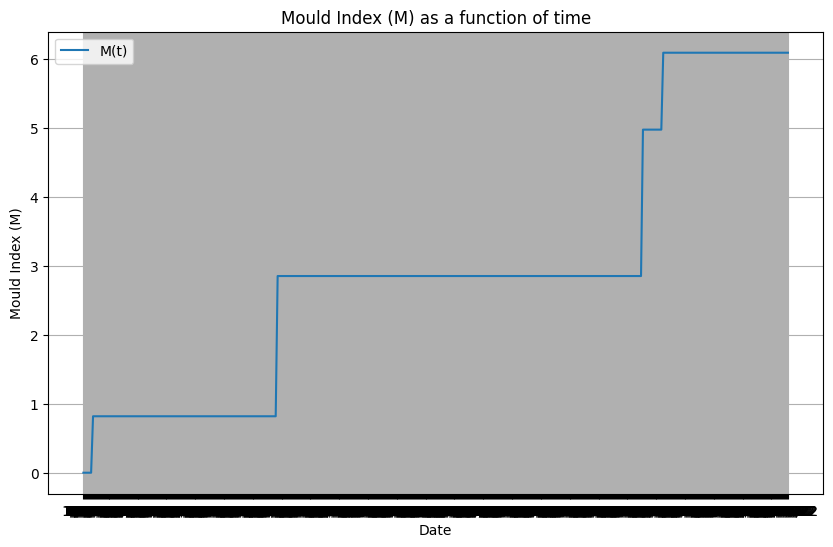

In [53]:
# Plot M as a function of time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['M'], label='M(t)')
plt.xlabel('Date')
plt.ylabel('Mould Index (M)')
plt.title('Mould Index (M) as a function of time')
plt.grid(True)
plt.legend()
plt.show()


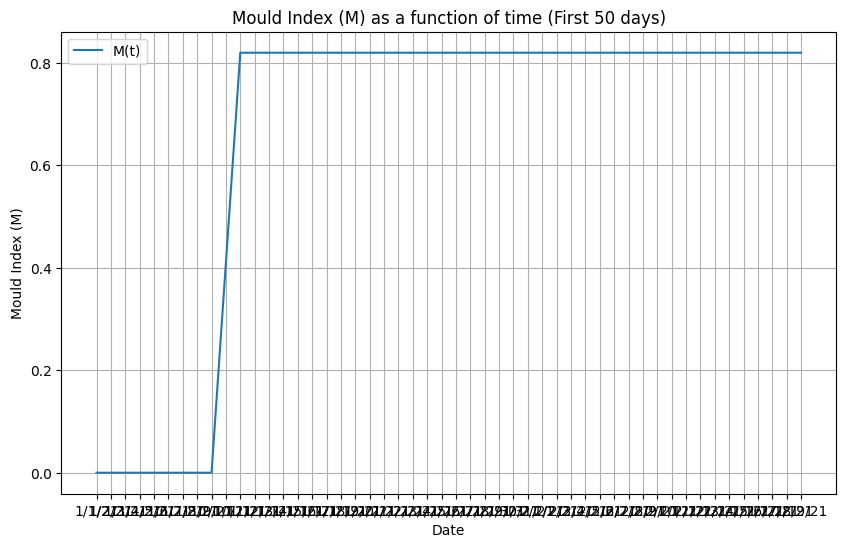

In [54]:
# Plot M as a function of time for the first 50 days
plt.figure(figsize=(10, 6))
plt.plot(data['Date'][:50], data['M'][:50], label='M(t)')
plt.xlabel('Date')
plt.ylabel('Mould Index (M)')
plt.title('Mould Index (M) as a function of time (First 50 days)')
plt.grid(True)
plt.legend()
plt.show()
